<a href="https://colab.research.google.com/github/Navdeep-varshney/Navdeep-varshney/blob/main/Churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from scipy.stats import pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df =pd.read_csv("Churn_modelling.txt")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df.head()  # This should work as expected


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:

# Assuming 'df' is your DataFrame
# Replace 'Exited' with the actual column name in your DataFrame

# Select categorical features (assuming they are of 'object' dtype)
categorical_features = df.select_dtypes(include=['object']).columns

# Calculate point-biserial correlation for each categorical feature
correlations = {}
for feature in categorical_features:
    pointbiserial_corr, _ = pointbiserialr(df[feature], df['Exited'])
    correlations[feature] = pointbiserial_corr

# Display correlation values
for feature, correlation in correlations.items():
    print(f"Correlation between {feature} and Exited: {correlation}")


NameError: name 'df' is not defined

In [ ]:
# Assuming 'df' is your DataFrame
# Replace 'Exited' with the actual column name in your DataFrame

# Select categorical features (assuming they are of 'object' dtype)
categorical_features = df.select_dtypes(include=['object']).columns

# Convert categorical features to numerical representation (e.g., using label encoding)
for feature in categorical_features:
    df[feature] = df[feature].astype('category').cat.codes

# Calculate point-biserial correlation for each categorical feature
correlations = {}
for feature in categorical_features:
    pointbiserial_corr, _ = pointbiserialr(df[feature], df['Exited'])
    correlations[feature] = pointbiserial_corr

# Display correlation values
for feature, correlation in correlations.items():
    print(f"Correlation between {feature} and Exited: {correlation}")


Correlation between Geography and Exited: 0.035942954606537035
Correlation between Gender and Exited: -0.10651248767347486


In [ ]:
categorical_features

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
df=df.drop(["Geography"],axis=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 11)

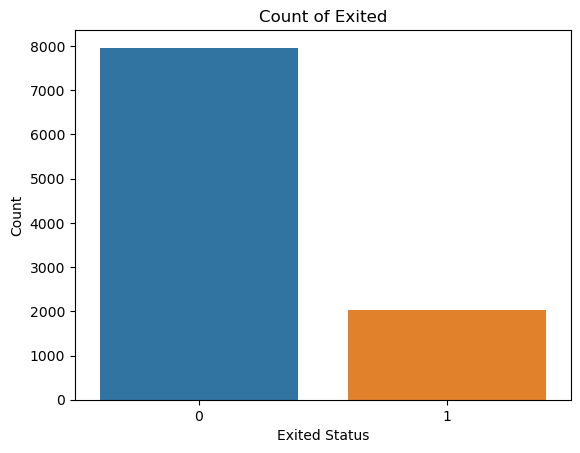

In [ ]:
sns.countplot(x='Exited', data=df)

# Add labels and title
plt.xlabel('Exited Status')
plt.ylabel('Count')
plt.title('Count of Exited')

# Show the plot
plt.show()

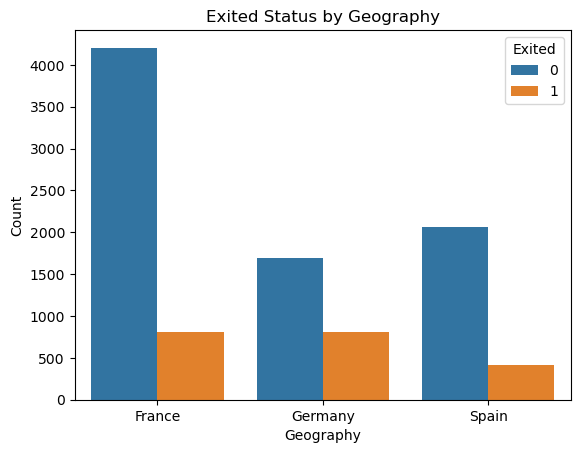

In [ ]:
# Count the number of occurrences for each combination of 'Exited' and 'Geography'
count_data = df.groupby(['Exited', 'Geography']).size().reset_index(name='Count')

# Create a bar plot
sns.barplot(x='Geography', y='Count', hue='Exited', data=count_data)

# Add labels and title
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Exited Status by Geography')

# Show the plot
plt.show()

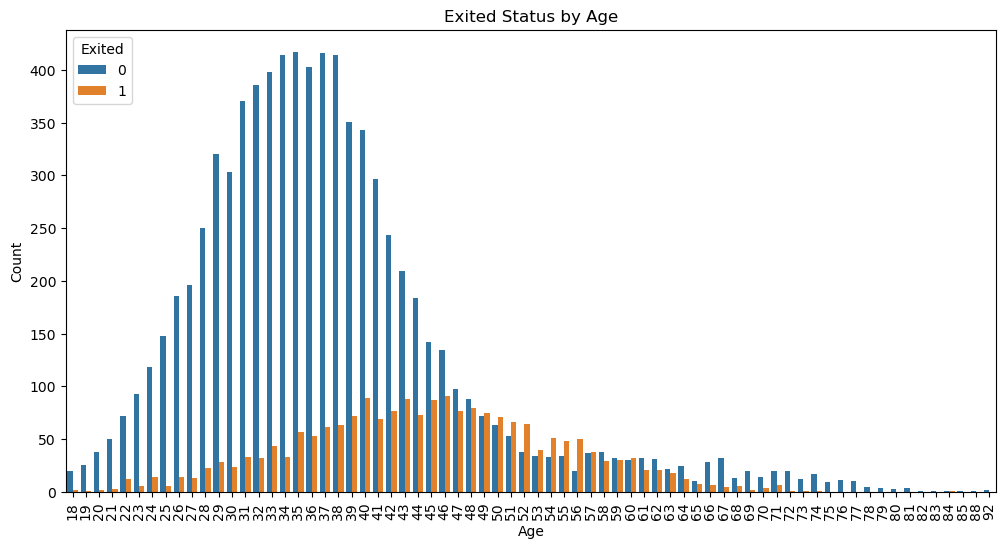

In [ ]:
# Count the number of occurrences for each combination of 'Exited' and 'Age'
count_data = df.groupby(['Exited', 'Age']).size().reset_index(name='Count')

# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create a bar plot with rotated x-axis labels
sns.barplot(x='Age', y='Count', hue='Exited', data=count_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Exited Status by Age')

# Show the plot
plt.show()

In [ ]:
# Mostly people above 48 and below 60  are excited to quit.

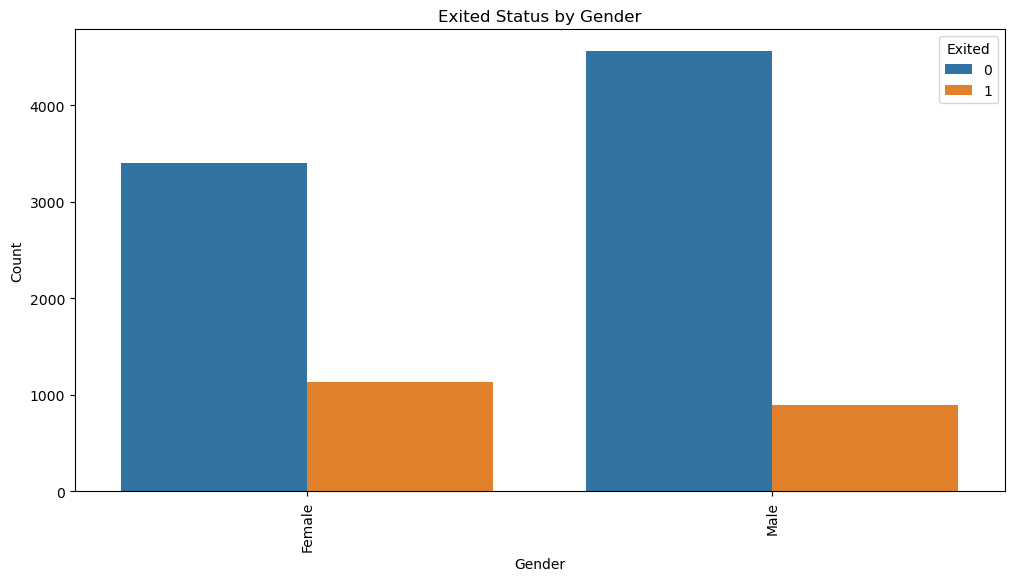

In [ ]:
# Count the number of occurrences for each combination of 'Exited' and 'Age'
count_data = df.groupby(['Exited', 'Gender']).size().reset_index(name='Count')

# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create a bar plot with rotated x-axis labels
sns.barplot(x='Gender', y='Count', hue='Exited', data=count_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Exited Status by Gender')

# Show the plot
plt.show()

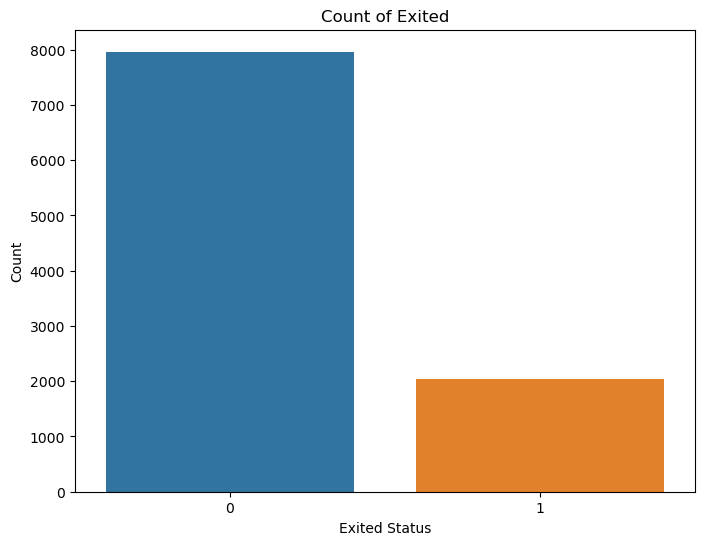

In [ ]:
# Set the size of the figure
plt.figure(figsize=(8, 6))

# Create a count plot for the 'Exited' column
sns.countplot(x='Exited', data=df)

# Add labels and title
plt.xlabel('Exited Status')
plt.ylabel('Count')
plt.title('Count of Exited')

# Show the plot
plt.show()

In [ ]:
# Get the data type of the "Exited" column
data_type_exited = df["Exited"].dtype

# Print the result
print("Data type of Exited column:", data_type_exited)

hi
Data type of Exited column: int64


In [ ]:
# Count the number of null values in the "Exited" column
count_null_values_exited = df["Exited"].isnull().sum()

# Print the result
print("Number of null values in Exited column:", count_null_values_exited)


Number of null values in Exited column: 0


In [ ]:
types_of_exited_data = df["Exited"].apply(type).unique()
print("Types of data in Exited column:", types_of_exited_data)


Types of data in Exited column: [<class 'int'>]


In [ ]:
unique_values_exited = df["Exited"].nunique()
print(unique_values_exited)


2


In [ ]:
unique_values_exited = df["Exited"].unique()
print(unique_values_exited)


[1 0]


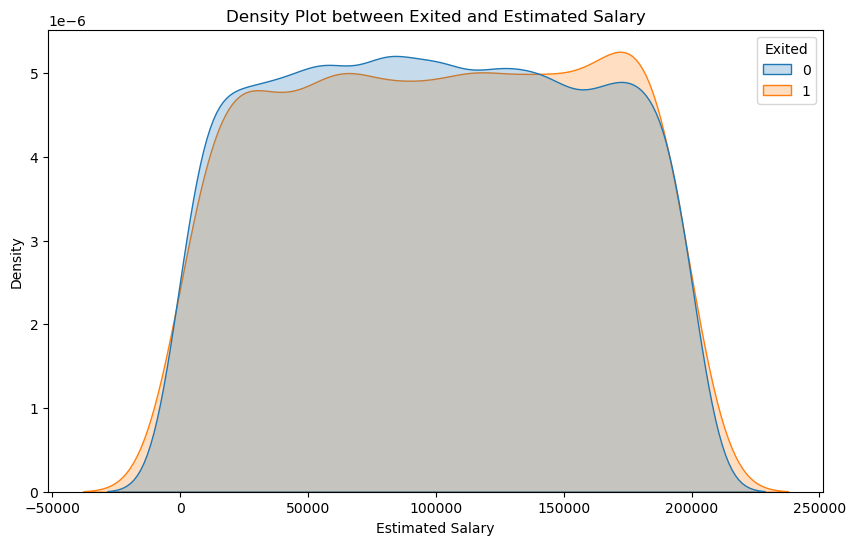

In [ ]:
plt.figure(figsize=(10, 6))

# Create a kernel density estimate (KDE) plot
sns.kdeplot(data=df, x='EstimatedSalary', hue='Exited', fill=True, common_norm=False)

# Add labels and title
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.title('Density Plot between Exited and Estimated Salary')

# Show the plot
plt.show()

In [ ]:
# People with salry between 150000 and 200000 are most likely to exited

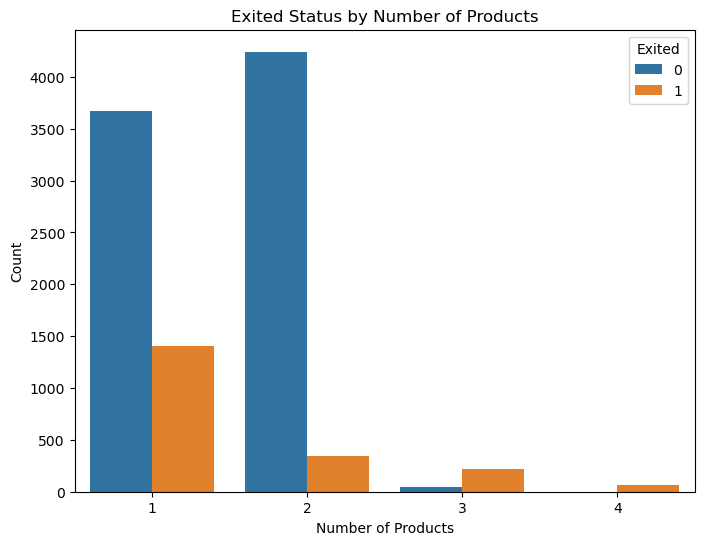

In [ ]:

# Assuming 'df' is your DataFrame
# Replace 'NumOfProducts' and 'Exited' with the actual column names in your DataFrame

# Set the size of the figure
plt.figure(figsize=(8, 6))

# Create a bar plot
sns.countplot(x='NumOfProducts', hue='Exited', data=df)

# Add labels and title
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Exited Status by Number of Products')

# Show the plot
plt.show()


In [ ]:
# The peoplw which have more than or equal to 3 product are most likely to exit.

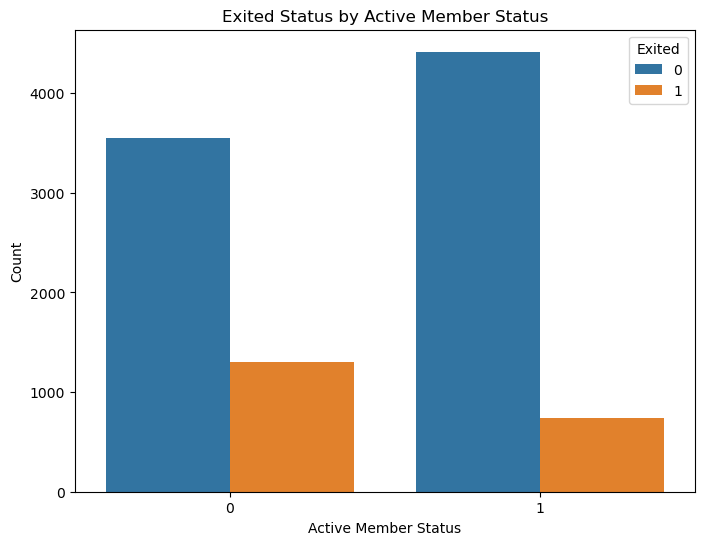

In [ ]:
plt.figure(figsize=(8, 6))
# Create a bar plot
sns.countplot(x='IsActiveMember', hue='Exited', data=df)

# Add labels and title
plt.xlabel('Active Member Status')
plt.ylabel('Count')
plt.title('Exited Status by Active Member Status')

# Show the plot
plt.show()

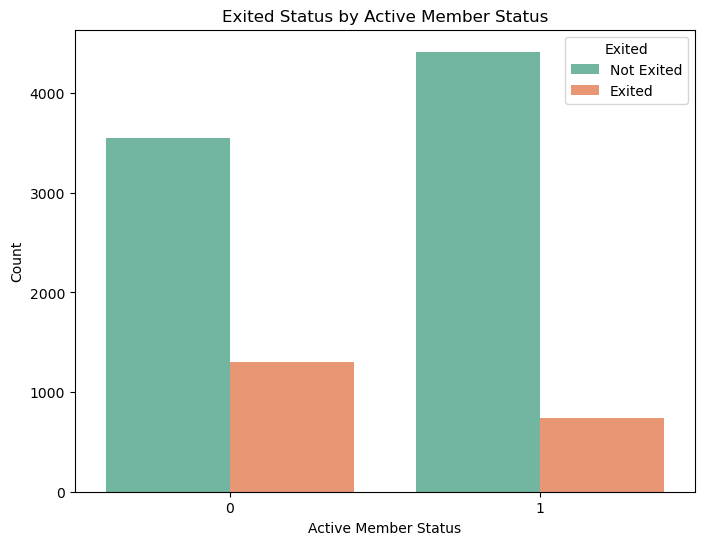

In [ ]:
plt.figure(figsize=(8, 6))

# Create a stacked bar plot
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Active Member Status')
plt.ylabel('Count')
plt.title('Exited Status by Active Member Status')

# Add a legend for clarity
plt.legend(title='Exited', loc='upper right', labels=['Not Exited', 'Exited'])

# Show the plot
plt.show()

In [ ]:
df = pd.get_dummies(df,drop_first = True)

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
correlation = df.corr()['Exited'].sort_values(ascending=False)

# Display the correlation values
print(correlation)

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64


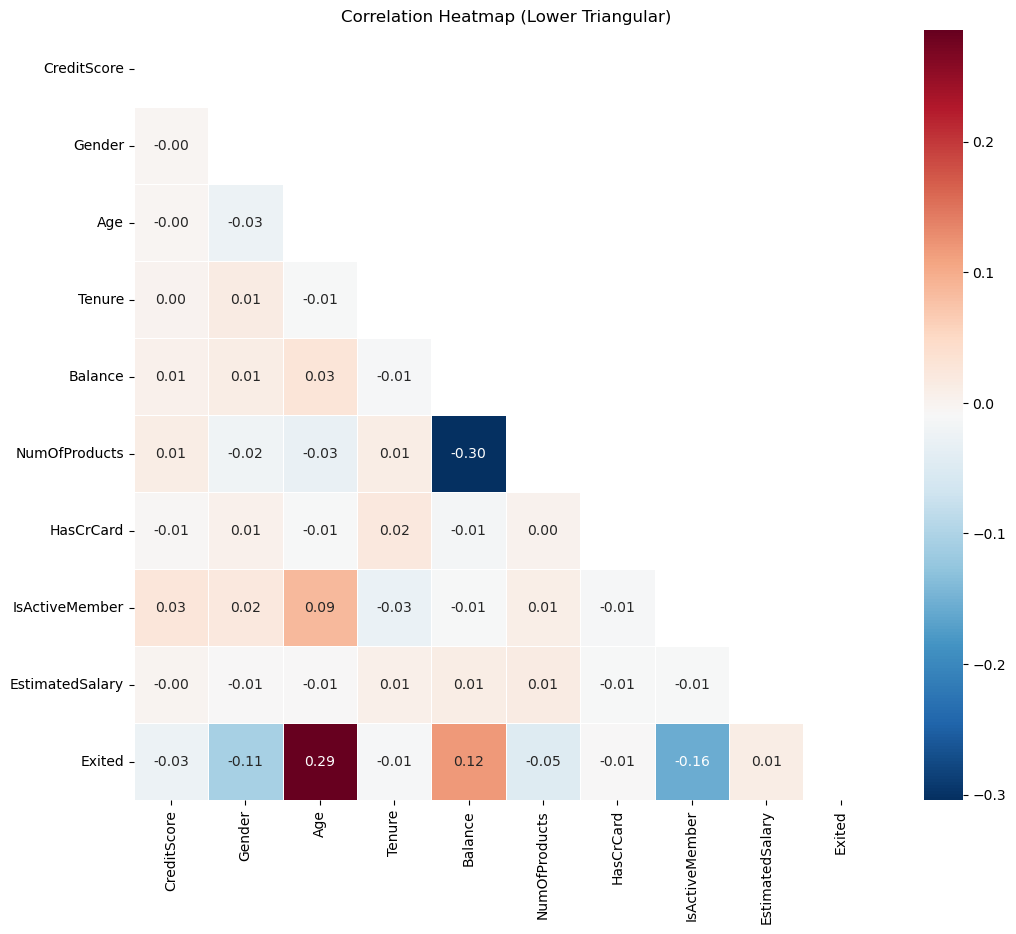

In [ ]:
correlation_matrix = df.corr()

# Create a mask to hide the upper triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with dark blue and dark red colors, using the mask
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=0.5, mask=mask)

# Add title
plt.title('Correlation Heatmap (Lower Triangular)')

# Show the plot
plt.show()

In [ ]:
print("hi")

hi


In [ ]:
correlation_with_exited = df.corr()['Exited']

# Exclude features with correlation between -0.1 and 0.1
selected_features = correlation_with_exited[(correlation_with_exited < -0.1) | (correlation_with_exited > 0.1)].index

# Prepare X and y
X = df[selected_features].drop('Exited', axis=1)  # Exclude 'Exited' for input features
y = df['Exited']  # Target variable

# Display selected features
print("Selected Features:")
print(selected_features)

# Display X and y
print("\nInput Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Selected Features:
Index(['Gender', 'Age', 'Balance', 'IsActiveMember', 'Exited'], dtype='object')

Input Features (X):
   Gender  Age    Balance  IsActiveMember
0       0   42       0.00               1
1       0   41   83807.86               1
2       0   42  159660.80               0
3       0   39       0.00               0
4       0   43  125510.82               1

Target Variable (y):
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [ ]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-1.26173328, -1.09728311,  0.67578614, ...,  0.6430943 ,
        -1.0411309 , -0.7897374 ],
       [ 2.06357923, -1.09728311, -0.27700304, ...,  0.6430943 ,
         0.96049401,  0.00867465],
       [-0.11897883,  0.91134183,  1.05690181, ...,  0.6430943 ,
        -1.0411309 ,  1.1872255 ],
       ...,
       [ 1.59000531, -1.09728311, -0.56283979, ...,  0.6430943 ,
         0.96049401, -0.34459923],
       [ 0.44725086,  0.91134183, -0.75339762, ..., -1.55498191,
         0.96049401,  1.429715  ],
       [ 1.53852988, -1.09728311,  2.29552774, ...,  0.6430943 ,
        -1.0411309 , -1.09450327]])

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.82

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, y_pred1)

0.7830188679245284

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.820
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       104
           1       0.78      0.86      0.82        96

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

Accuracy: 0.82

Confusion Matrix:
[[81 23]
 [13 83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       104
           1       0.78      0.86      0.82        96

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



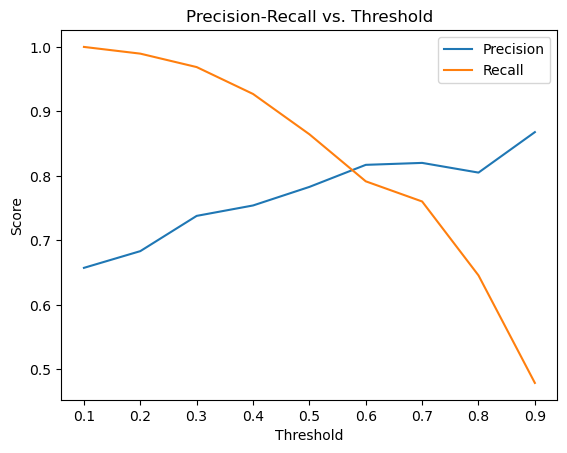

In [ ]:
# Create an array of threshold values
thresholds = np.arange(0.1, 1.0, 0.1)

# Lists to store precision and recall values
precision_values = []
recall_values = []

# Calculate precision and recall for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_probabilities >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)

    precision_values.append(precision)
    recall_values.append(recall)

# Plot Precision-Recall curve
plt.plot(thresholds, precision_values, label='Precision')
plt.plot(thresholds, recall_values, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs. Threshold')
plt.legend()
plt.show()


In [ ]:
# Assuming y_probabilities contains the predicted probabilities for the positive class
threshold = 0.4
y_pred_threshold = (y_probabilities >= threshold).astype(int)

# Calculate metrics using the new threshold
accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)

# Print the metrics
print(f"Threshold: {threshold}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Threshold: 0.4
Accuracy: 0.820
Precision: 0.754
Recall: 0.927
F1 Score: 0.832


In [ ]:
#Above values are very good according to metric.

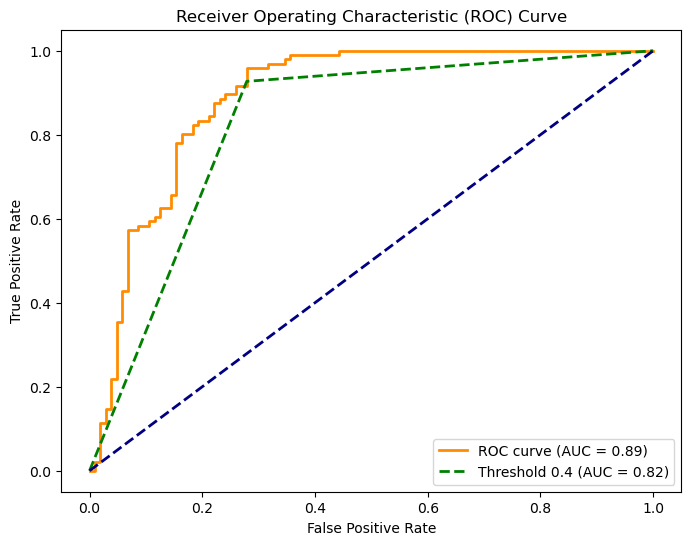

In [ ]:
threshold = 0.4
y_pred_threshold = (y_probabilities >= threshold).astype(int)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

# Compute ROC curve and AUC for the specified threshold
fpr_threshold, tpr_threshold, _ = roc_curve(y_test, y_pred_threshold)
roc_auc_threshold = auc(fpr_threshold, tpr_threshold)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot(fpr_threshold, tpr_threshold, color='green', lw=2, linestyle='--', label=f'Threshold {threshold} (AUC = {roc_auc_threshold:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

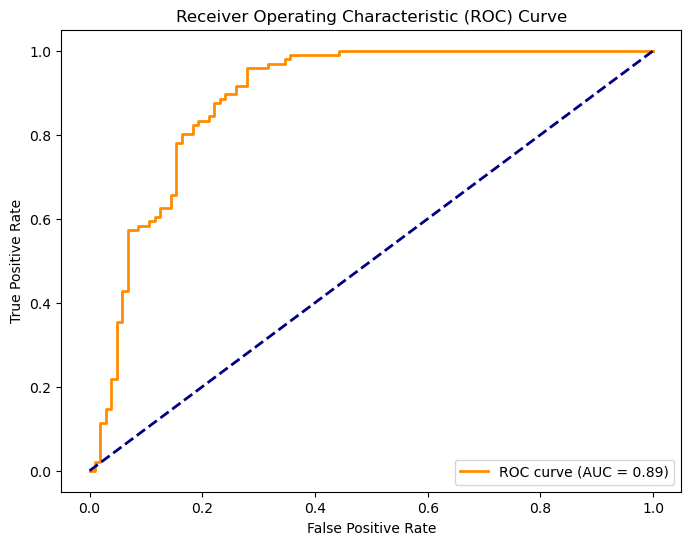

In [ ]:

# Get predicted probabilities for the positive class
y_probabilities = model.predict_proba(X_test)[:, 1]

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
